# Viral Video Classification
Unsupervised classification task using date, number of views, and other video metadata to assign viral video status.

## Task
A fictitious company VideoTech is an ad-supported online video website, just like YouTube. The CEO has noticed that the homepage of the website has a high bounce rate compared to competitors. When visitors come to the homepage, many leave without watching a video or clicking on ads.

The company spends millions to acquire users but due to the high bounce rate the ROI of those acquisition efforts is low. Currently, the videos shown on the homepage are chosen manually. The CEO thinks that by creating a recommended video section on the homepage, user engagement will go up and bounce rate will go down.

The CEO asks you to come up with a definition for a viral video, videos with view counts that are trending up. The heuristic you choose will be used to choose videos to show in the recommended video section of the homepage. Use the data provided to determine how to classify a video as a viral video.

## Data

The data set available contains 2 tables -

**`video_count`**
- `video_id`: the unique identifier of a video on the website
- `count`: the number of views for a video in a day
- `date`: the day the video was seen

**`video_features`**
- `video_id`: the unique identifier of a video on the website
- `video_length`: length of the video in seconds
- `video_language`: language of the video, as selected by the user when uploaded
- `video_upload_date`: when the video was uploaded
- `video_quality`: quality of the video. One of [240p, 360p, 480p, 720p, 1080p]

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data Files and Inspect

### video_count 

In [2]:
counts = pd.read_csv('video_count.csv')

In [3]:
counts.head()

,video_id,count,date
0,2303,22,2015-01-07
1,1193,54854,2015-01-12
2,1219,1788779,2015-01-03
3,1472,234,2015-01-04
4,2947,14407,2015-01-08


In [4]:
#Convert date column to datetime type
counts['date'] = pd.to_datetime(counts['date'])

In [5]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41775 entries, 0 to 41774
Data columns (total 3 columns):
video_id    41775 non-null int64
count       41775 non-null int64
date        41775 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 979.2 KB


In [6]:
counts.date.value_counts()

2015-01-10    2785
2015-01-03    2785
2015-01-09    2785
2015-01-02    2785
2015-01-15    2785
2015-01-08    2785
2015-01-01    2785
2015-01-14    2785
2015-01-07    2785
2015-01-13    2785
2015-01-06    2785
2015-01-12    2785
2015-01-05    2785
2015-01-11    2785
2015-01-04    2785
Name: date, dtype: int64

The data only covers 15 days of video views in 2015. This limits things quite a bit. Also of note is that the videos were all uploaded in the month prior.

### video_features

In [7]:
features = pd.read_csv('video_features.csv')

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 5 columns):
video_id             2785 non-null int64
video_length         2785 non-null int64
video_language       2785 non-null object
video_upload_date    2785 non-null object
video_quality        2785 non-null object
dtypes: int64(2), object(3)
memory usage: 108.9+ KB


In [9]:
#Set video ID as the index as it is the unique identifier in this table
features.set_index('video_id', inplace=True)
features.head()

,video_length,video_language,video_upload_date,video_quality
video_id,,,,
2374,1760,Cn,2014-12-06,480p
1897,489,Cn,2014-12-10,720p
2386,1273,Es,2014-12-05,480p
2912,986,Es,2014-12-10,240p
2432,1050,Other,2014-12-10,480p


# Look at some plots of video views

In [10]:
counts.head()

,video_id,count,date
0,2303,22,2015-01-07
1,1193,54854,2015-01-12
2,1219,1788779,2015-01-03
3,1472,234,2015-01-04
4,2947,14407,2015-01-08


In [142]:
videos_to_plot = [1, 1193, 1219, 1472, 2947]

In [143]:
def plot_video_trends(list_of_vid_ids, legend=True, figsize=(15,8)):
    v_id = list_of_vid_ids.pop(0)
    ax = counts[counts.video_id==v_id].plot(x='date',y='count',label=v_id, legend=legend, figsize=figsize)
    for v_id in list_of_vid_ids:
        ax = counts[counts.video_id==v_id].plot(x='date',y='count',label=v_id, ax=ax, legend=legend)

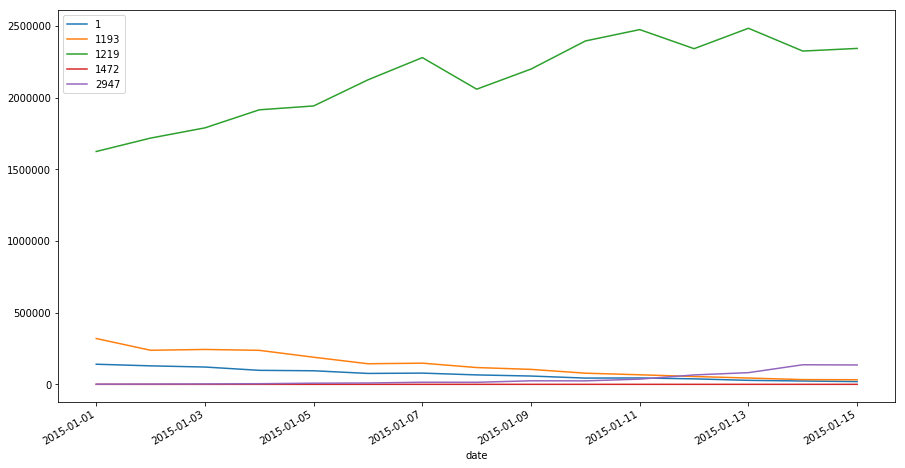

In [144]:
plot_video_trends(videos_to_plot)

# Get total views over entire 15 day period
Merge with features dataframe for further insight regarding video metadata

In [69]:
total_views = counts.groupby('video_id').sum().sort_values(by='count',ascending=False)

In [72]:
total_views_merged = features.merge(total_views, left_index=True, right_index=True).sort_values(by='count',ascending=False)

In [86]:
total_views_merged.head(20)

,video_length,video_language,video_upload_date,video_quality,count
video_id,,,,,
692,627,Other,2014-12-14,480p,63178982
2905,420,En,2014-12-16,1080p,63165709
1481,683,De,2014-12-12,720p,60637382
1480,482,Cn,2014-12-16,1080p,59879519
2688,680,En,2014-12-17,360p,57862803
1284,316,Cn,2014-12-17,1080p,57635939
275,185,Cn,2014-12-16,1080p,57549865
1822,377,En,2014-12-09,720p,57276388
2225,497,Es,2014-12-13,360p,56956069


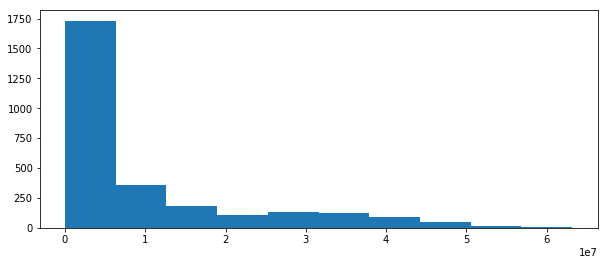

In [85]:
plt.figure(figsize=(10,4))
plt.hist(total_views_merged['count']);
#total_views_merged.hist()

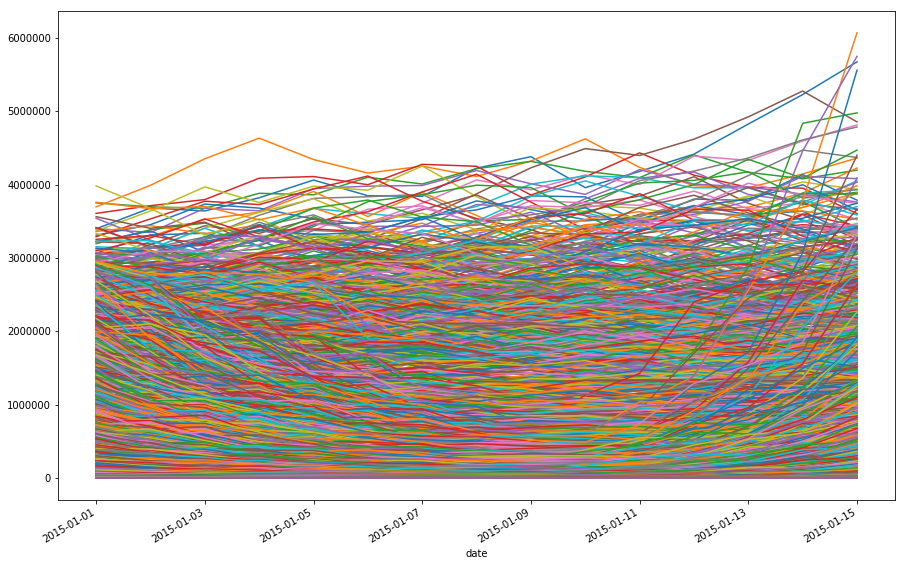

In [145]:
#ALL VIDEOS
plot_video_trends(list(total_views_merged.index.values), legend=False, figsize=(15,10))

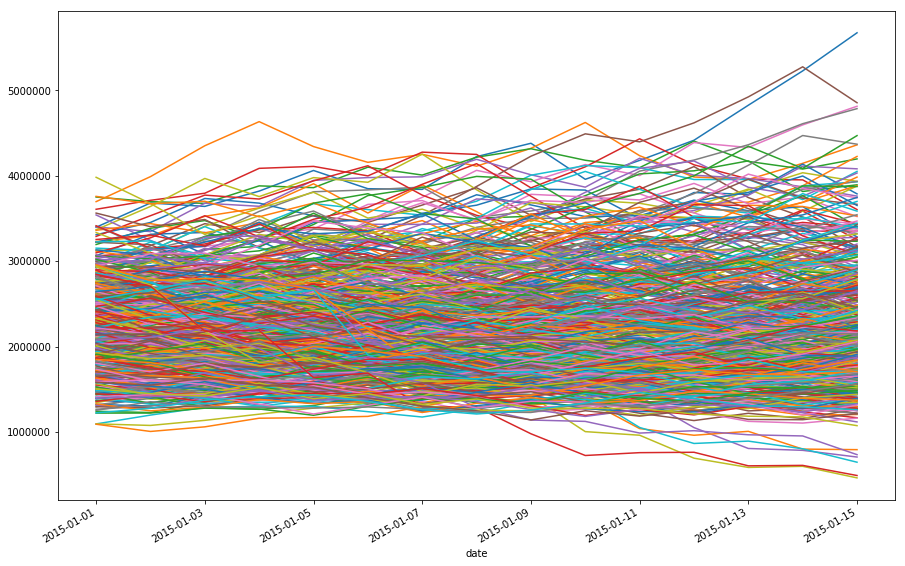

In [147]:
#Top 500
plot_video_trends(list(total_views_merged.head(500).index.values), legend=False, figsize=(15,10))

We want to see if they are trending upward

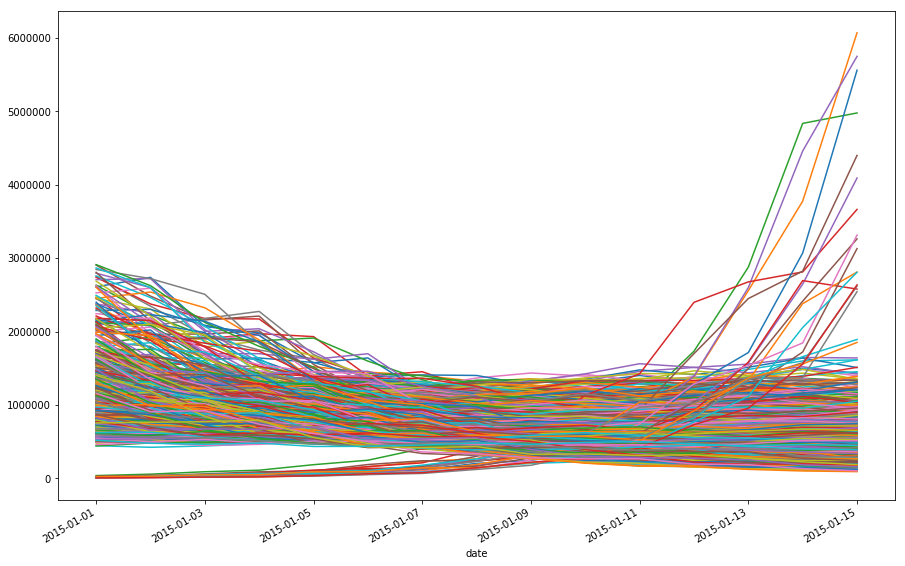

In [159]:
#500-1000
plot_video_trends(list(total_views_merged.iloc[500:1000].index.values), legend=False, figsize=(15,10))

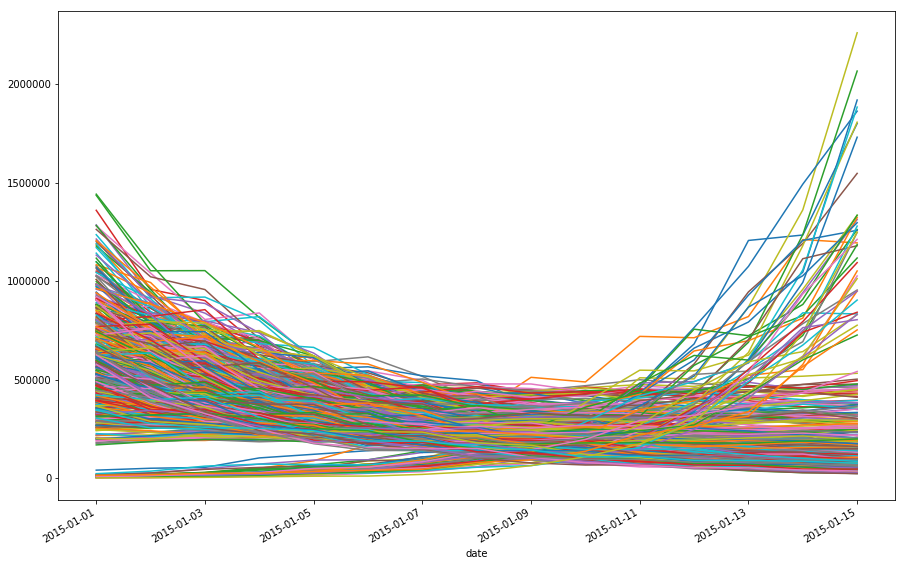

In [160]:
#1000-1500
plot_video_trends(list(total_views_merged.iloc[1000:1500].index.values), legend=False, figsize=(15,10))